## 28.实现 strStr() 函数。

实现 strStr() 函数。

给你两个字符串 haystack 和 needle ，请你在 haystack 字符串中找出 needle 字符串出现的第一个位置（下标从 0 开始）。如果不存在，则返回  -1 。

说明：

- 当 needle 是空字符串时，我们应当返回什么值呢？这是一个在面试中很好的问题。
- 对于本题而言，当 needle 是空字符串时我们应当返回 0 。这与 C 语言的 strstr() 以及 Java 的 indexOf() 定义相符。


示例 1：
```
输入：haystack = "hello", needle = "ll"
输出：2
```
示例 2：
```
输入：haystack = "aaaaa", needle = "bba"
输出：-1
```
示例 3：
```
输入：haystack = "", needle = ""
输出：0
```

提示：
```
0 <= haystack.length, needle.length <= 5 * 104
haystack 和 needle 仅由小写英文字符组成
```

In [17]:
class Solution:
    def strStr(self, haystack: str, needle: str) -> int:
        if needle == "":
            return 0
        i = 0
        for idx in range(len(haystack)):
            if haystack[idx:idx+len(needle)] == needle:
                return idx
        return -1

### Sunday 解法
相似的查找算法有 KMP，BM，Horspool，挑了一个在实际情况中效果较好且理解简单的算法，即 Sunday 算法。

#### 一、Sunday 匹配机制
匹配机制非常容易理解：

- 目标字符串String
- 模式串 Pattern
- 当前查询索引 idx （初始为 00）
- 待匹配字符串 str_cut : String [ idx : idx + len(Pattern) ]

每次匹配都会从 **目标字符串中** 提取 待匹配字符串与 **模式串** 进行匹配：

- 若匹配，则返回当前 `idx`
- 不匹配，则查看 待匹配字符串 的后一位字符 `c`：
   1. 若c存在于Pattern中，则 idx = idx + 偏移表[c]
   2. 否则，idx = idx + len(pattern)

Repeat Loop 直到 `idx + len(pattern) > len(String)`

#### 二、偏移表
偏移表的作用是存储每一个在 **模式串** 中出现的字符，在 **模式串** 中出现的最右位置到尾部的距离 $+1$，例如 `aab`：

- a 的偏移位就是 len(pattern)-1 = 2
- b 的偏移位就是 len(pattern)-2 = 1
- 其他的均为 len(pattern)+1 = 4

综合一下：
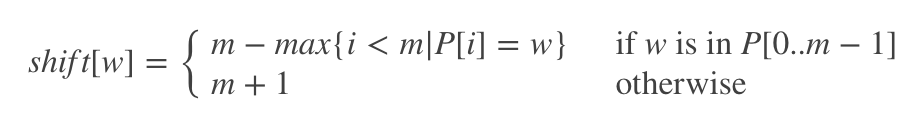

#### 三、举例
1. String: `checkthisout`
2. Pattern: `this`

**Step 1:**

- `idx = 0`
- 待匹配字符串为：chec
- 因为 chec != this
- 所以查看 chec 的下一个字符 k
- k 不在 Pattern 里
- 所以查看 偏移表，idx = idx + 5

**Step 2:**

- `idx = 5`
- 待匹配字符串为：`this`
- 因为 `this == this`
- 匹配，所以返回 $5$

1. String: `mississippit`
2. Pattern: `issip`

**Step 1:**

- `idx = 0`
- 待匹配字符串为：missi
- 因为 `missi != issip`
- 所以查看 `missi` 的下一个字符 `s`
- `s` 在 Pattern 里
- 所以查看 偏移表，idx = idx + (len(Pattern) - 2) = 3

**Step 2:**

- `idx = 3`
- 待匹配字符串为：`sissi`
- 因为 `sissi != issip`
- 所以查看 `sissi` 的下一个字符 `p`
- `p` 在 Pattern 里
- 所以查看 偏移表，idx = idx + (len(Pattern) - 4) = 4

**Step 3:**

- `idx = 4`
- 待匹配字符串为：`issip`
- 因为 `issip == issip`
- 匹配，所以返回 $4$

#### 四、算法分析
- 最坏情况：$O(nm)$
- 平均情况：$O(n)$

In [26]:
class Solution:
    def strStr(self, haystack: str, needle: str) -> int:
        def calShiftMat(st):
            dic = {}
            for i in range(len(st)-1, -1, -1):
                if not dic.get(st[i]):
                    dic[st[i]] = len(st) - i
            dic["oc"] = len(st) + 1
            return dic
        
        if len(needle) > len(haystack): return -1
        if needle == "": return 0
        
        # Shift Matrix pre-generate
        dic = calShiftMat(needle)
        idx = 0
        
        while idx+len(needle) <= len(haystack):
            # string to match
            str_cut = haystack[idx:idx+len(needle)]
            if str_cut == needle:
                return idx
            else:
                # 边界处理
                if idx+len(needle) >= len(haystack):
                    return -1
                cur_c = haystack[idx+len(needle)]
                if dic.get(cur_c):
                    idx += dic[cur_c]
                else:
                    idx += dic["ot"]
                    
        return -1 if idx+len(needle)>= len(haystack) else idx

In [27]:
ss = Solution()
res_1 = ss.strStr(haystack = "aaaaa", needle = "bba")
res_2 = ss.strStr(haystack = "hello", needle = "ll")
res_3 = ss.strStr(haystack = "a", needle = "a")
res_4 = ss.strStr(haystack = "mississippi", needle = "issip")
print(res_1)
print(res_2)
print(res_3)
print(res_4)

-1
2
0
4


## 91. 解码方法
一条包含字母 A-Z 的消息通过以下映射进行了 编码 ：

'A' -> 1
'B' -> 2
...
'Z' -> 26
要 解码 已编码的消息，所有数字必须基于上述映射的方法，反向映射回字母（可能有多种方法）。例如，"11106" 可以映射为：

"AAJF" ，将消息分组为 (1 1 10 6)
"KJF" ，将消息分组为 (11 10 6)
注意，消息不能分组为  (1 11 06) ，因为 "06" 不能映射为 "F" ，这是由于 "6" 和 "06" 在映射中并不等价。

给你一个只含数字的 非空 字符串 s ，请计算并返回 解码 方法的 总数 。

题目数据保证答案肯定是一个 32 位 的整数。

示例 1：
```
输入：s = "12"
输出：2
解释：它可以解码为 "AB"（1 2）或者 "L"（12）。
```
示例 2：
```
输入：s = "226"
输出：3
解释：它可以解码为 "BZ" (2 26), "VF" (22 6), 或者 "BBF" (2 2 6) 。
```
示例 3：
```
输入：s = "0"
输出：0
解释：没有字符映射到以 0 开头的数字。
含有 0 的有效映射是 'J' -> "10" 和 'T'-> "20" 。
由于没有字符，因此没有有效的方法对此进行解码，因为所有数字都需要映射。
```
示例 4：
```
输入：s = "06"
输出：0
解释："06" 不能映射到 "F" ，因为字符串含有前导 0（"6" 和 "06" 在映射中并不等价）。
 ```

提示：
```
1 <= s.length <= 100
s 只包含数字，并且可能包含前导零。
```

**对于字符串 s 的某个位置 i 而言，我们只关心「位置 i 自己能否形成独立 item 」和「位置 i 能够与上一位置（i-1）能否形成 item」，而不关心 i-1 之前的位置。**

定义 $dp[i]$ 为考虑前 $i$ 个字符的解码方案数.
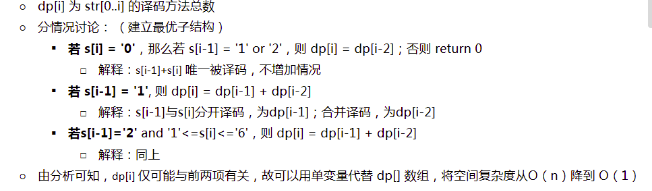


In [3]:
class Solution:
    def numDecodings(self, s: str) -> int:
        if s[0] == '0': return 0
        pre, curr = 1, 1
        for i in range(1, len(s)):
            tmp = curr
            if s[i]=='0':
                if s[i-1] == '1' or s[i-1] == '2': curr = pre
                else: return 0
            elif s[i-1] == '1' or (s[i-1] == '2' and s[i]<='6' and s[i]>='1'):
                curr = curr + pre
            pre = tmp
        return curr
                    
        

In [6]:
ss = Solution()
res1 = ss.numDecodings(s = "226")
print(res1)

3


```
[1]
ss = '226'
s[1-1] = s[0] = '2' and '1'<s[1]='2'<'6'  
--> [1,2], 2种：{['2','2'],['22']}
s[2-1] = s[1] = '2' and '1'<s[1]='6'<='6'  
--> [1,2,3], 3种：{['2','26'], ['22','6'], ['2', '2', '6']}
```

## 131. 分割回文串
给你一个字符串 s，请你将 s 分割成一些子串，使每个子串都是 回文串 。返回 s 所有可能的分割方案。

回文串 是正着读和反着读都一样的字符串。


示例 1：
```
输入：s = "aab"
输出：[["a","a","b"],["aa","b"]]
```
示例 2：
```
输入：s = "a"
输出：[["a"]]
 ```

提示：

- 1 <= s.length <= 16
- s 仅由小写英文字母组成

### 回溯法
「回溯法」实际上是一个类似枚举的搜索尝试过程，主要是在搜索尝试过程中寻找问题的解，当发现已不满足求解条件时，就「回溯」返回，尝试别的路径。

回溯法是一种算法思想，而递归是一种编程方法，回溯法可以用递归来实现。

回溯法的整体思路是：搜索每一条路，每次回溯是对具体的一条路径而言的。对当前搜索路径下的的未探索区域进行搜索，则可能有两种情况：

- 当前未搜索区域满足结束条件，则保存当前路径并退出当前搜索；
- 当前未搜索区域需要继续搜索，则遍历当前所有可能的选择：如果该选择符合要求，则把当前选择加入当前的搜索路径中，并继续搜索新的未探索区域。

上面说的未搜索区域是指搜索某条路径时的未搜索区域，并不是全局的未搜索区域。

回溯法搜所有可行解的模板一般是这样的：
``` python
res = []
path = []

def backtrack(未探索区域, res, path):
    if 未探索区域满足结束条件:
        res.add(path) # 深度拷贝
        return
    for 选择 in 未探索区域当前可能的选择:
        if 当前选择符合要求:
            path.add(当前选择)
            backtrack(新的未探索区域, res, path)
            path.pop()
```
`backtrack` ：未探索区域中到达结束条件的所有可能路径，path 变量是保存的是一条路径，res 变量保存的是所有搜索到的路径。所以当「未探索区域满足结束条件」时，需要把 path 放到结果 res 中。

`path.pop()` :它是编程实现上的一个要求，即我们从始至终只用了一个变量 path，所以当对 path 增加一个选择并 backtrack 之后，需要清除当前的选择，防止影响其他路径的搜索。

本题需要我们把字符串分成一系列的回文子串，按照模板，我们的思路应该是这样的：

- 未探索区域：剩余的未搜索的字符串 s；
- 结束条件：s 为空；
- 未探索区域当前可能的选择：每次选择可以选取 s 的 1 - length 个字符，$cur = s[0...i]$；
- 当前选择符合要求：cur 是回文字符串 $isPalindrome(cur)$；
- 新的未探索区域：s 去除掉 cur 的剩余字符串，$s[i + 1...N]$]。

在每次搜索位置区域的时候，使用的是产生一个新数组 path + [s[:i]] ，这样好处是方便：不同的路径使用的是不同的 path，因此不需要 path.pop() 操作；而且 res.append(path) 的时候不用深度拷贝一遍 path。

In [16]:
from typing import List

class Solution:
    def partition(self, s):
        self.isPalindrome = lambda s : s == s[::-1]
        res = []
        self.backtrack(s, res, [])
        return res
        
    def backtrack(self, s, res, path):
        if not s:
            res.append(path)
            return
        for i in range(1, len(s) + 1): #注意起始和结束位置
            if self.isPalindrome(s[:i]):
                self.backtrack(s[i:], res, path + [s[:i]])
from typing import List

class Solution:
    def partition(self, s):
        self.isPalindrome = lambda s: s == s[::-1]
        res = []
        self.backtrack(s, res, [])
        return res
    
    def backtrack(self, s, res, path):
        if not s:
            res.append(path)
            return res
        for i in range(1, len(s) + 1):
            if self.isPalindrome(s[:i]):
                print(s[:i], path, s)
                self.backtrack(s[i:], res, path+[s[:i]])

In [17]:
ss = Solution()
res1 = ss.partition(s = "aab")
print(res1)

a [] aab
a ['a'] ab
b ['a', 'a'] b
aa [] aab
b ['aa'] b
[['a', 'a', 'b'], ['aa', 'b']]
